In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE 
%matplotlib inline

# Loading the data

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


age (Age in years) <br/>
sex : (1 = male, 0 = female) <br/>
cp (Chest Pain Type): [0: Typical Angina, 1: Atypical Angina, 2: Non-Anginal Pain, 3: Asymptomatic] <br/>
trestbps (Resting Blood Pressure in mm/hg ) <br/>
chol (Serum Cholesterol in mg/dl) <br/>
fps (Fasting Blood Sugar > 120 mg/dl): [0 = no, 1 = yes] <br/>
restecg (Resting ECG): [0: normal, 1: having ST-T wave abnormality , 2: showing probable or definite left ventricular hypertrophy] <br/>
thalach (maximum heart rate achieved) <br/>
exang (Exercise Induced Angina): [1 = yes, 0 = no] <br/>
oldpeak (ST depression induced by exercise relative to rest) <br/>
slope (the slope of the peak exercise ST segment) <br/>
ca [number of major vessels (0–3)] <br/>
thal : [1 = normal, 2 = fixed defect, 3 = reversible defect] <br/>
target: [0 = disease, 1 = no disease] <br/>

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Checking for null values

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Checking if all the discrete features have the right ranges and fixing them

In [6]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

Feature ‘ca’ ranges from 0–3, however, df.nunique() listed 5 unique values. <br/>
Similarly, Feature ‘thal’ ranges from 1–3, however, df.nunique() listed 4 unique values.

In [7]:
# Checking the values in the features with excess ranges
print("ca has ", df['ca'].unique(), "\nthal has ", df['thal'].unique())

ca has  [0 2 1 3 4] 
thal has  [1 2 3 0]


In [8]:
# Replacing the odd values with the median
df.loc[df['ca']==4, 'ca'] = df['ca'].median()
df.loc[df['thal']==0, 'thal'] = df['thal'].median()

# Verifying the fix
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            4
thal          3
target        2
dtype: int64

### Checking for outliers by plotting boxplots

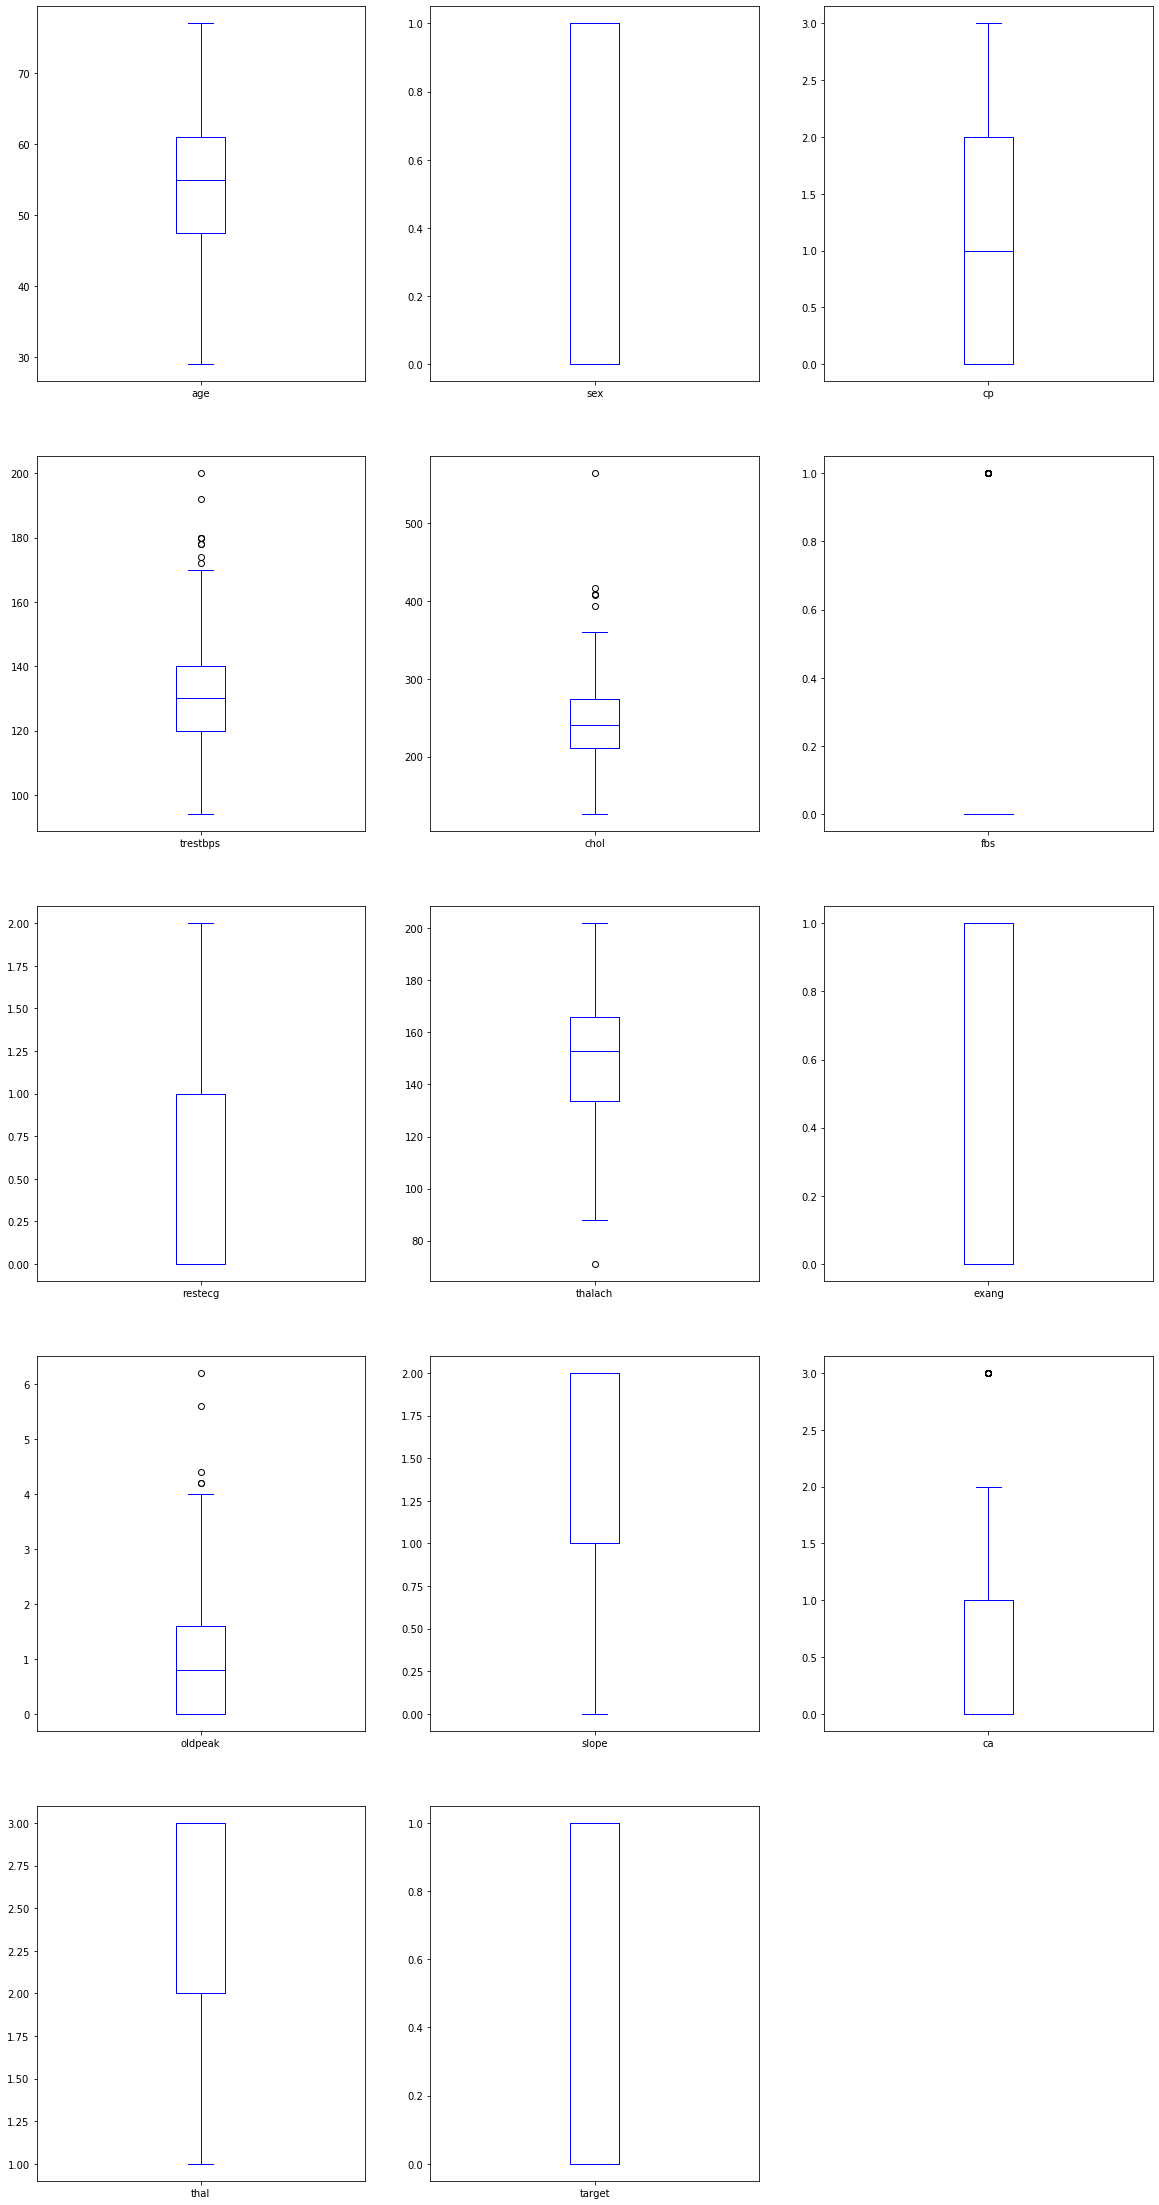

In [9]:
df.plot(kind='box', subplots=True, layout=(5,3),
sharex=False,sharey=False, figsize=(20, 40), 
color='blue');

### Removing the outliers

In [10]:
# define continuous variable & plot
continous_features = ['age','trestbps','chol','thalach','oldpeak']  
def outliers(df_out):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        df.drop(outliers, inplace = True, errors = 'ignore')
        print('Outliers from {} feature removed\n'.format(each_feature))

outliers(df[continous_features])

For the feature age, No of Outliers is 0
Outliers from age feature removed

For the feature trestbps, No of Outliers is 9
Outliers from trestbps feature removed

For the feature chol, No of Outliers is 5
Outliers from chol feature removed

For the feature thalach, No of Outliers is 1
Outliers from thalach feature removed

For the feature oldpeak, No of Outliers is 5
Outliers from oldpeak feature removed



In [11]:
# Renaming the labels of categorical features for better visualizations of the data
# df['target'] = df.target.replace({1: "Disease", 0: "No_disease"})
# df['sex'] = df.sex.replace({1: "Male", 0: "Female"})
# df['cp'] = df.cp.replace({0: "typical_angina", 
#                           1: "atypical_angina", 
#                           2:"non-anginal pain",
#                           3: "asymtomatic"})
# df['exang'] = df.exang.replace({1: "Yes", 0: "No"})
# df['fbs'] = df.fbs.replace({1: "True", 0: "False"})
# df['slope'] = df.slope.replace({0: "upsloping", 1: "flat",2:"downsloping"})
# df['thal'] = df.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"})

### Creating bar plots and pie charts for each feature to understand the data better

### Feature 1: Age

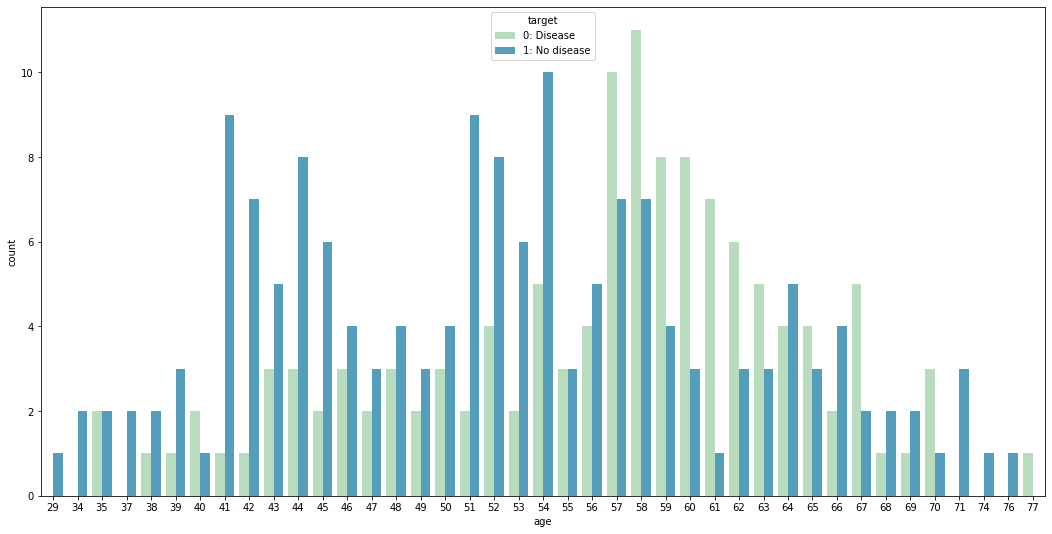

In [12]:
plt.figure(figsize=(18,9))
ax = sns.countplot(x='age',data = df, hue = 'target',palette='GnBu')
leg = ax.get_legend()
new_labels = ['0: Disease', '1: No disease']
for t, l in zip(leg.texts, new_labels): t.set_text(l)
plt.show()

### We observe from the above bar chart that old people are more likely to have a heart disease than young people

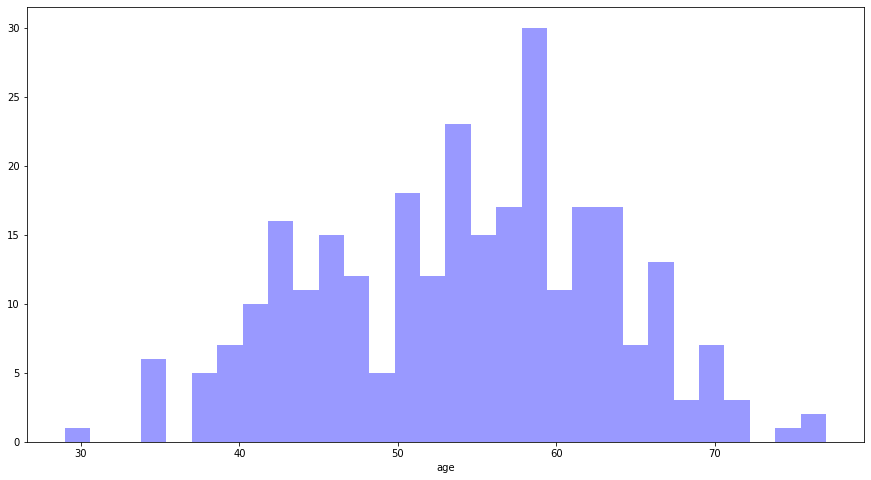

In [13]:
plt.figure(figsize=(15,8))
sns.distplot(df['age'],kde=False,bins=30,color='blue')
plt.show()

### The above chart shows that the distribution of age feature  is right skewed

### Feature 2: Sex

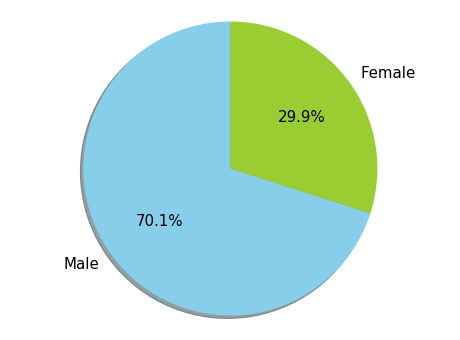

In [14]:
male =len(df[df['sex'] == 1])
female = len(df[df['sex']== 0])

plt.figure(figsize=(8,6))

# Data to plot
labels = 'Male','Female'
sizes = [male,female]
colors = ['skyblue', 'yellowgreen']
explode = (0, 0)  # explode 1st slice
textprops = {"fontsize":15} # Font size of text in pie chart

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90, textprops =textprops)
 
plt.axis('equal')
plt.show()

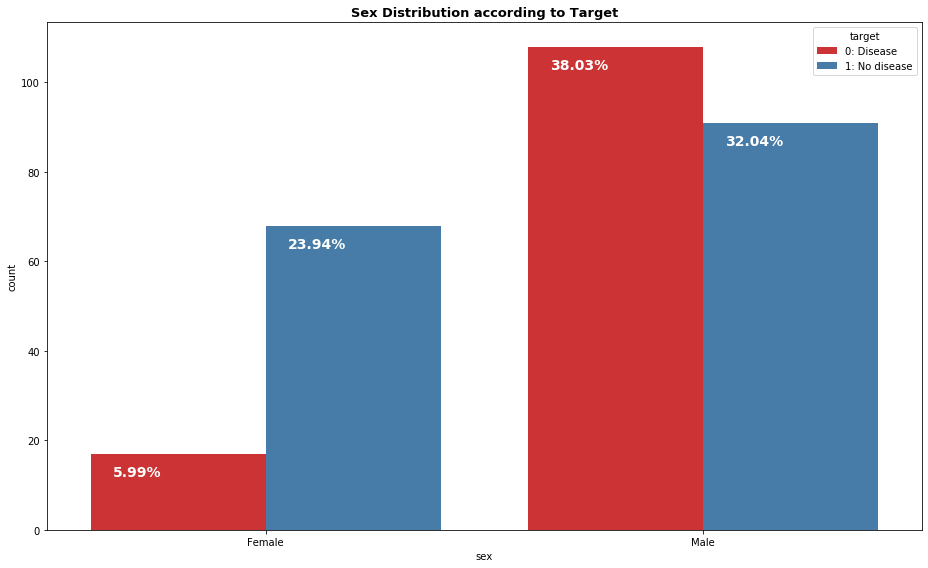

In [15]:
fig, ax = plt.subplots(figsize=(13,8))
ax = sns.countplot(x='sex', hue='target', data=df, palette='Set1')
ax.set_title("Sex Distribution according to Target", fontsize = 13, weight = 'bold')
ax.set_xticklabels (["Female", "Male"])
leg = ax.get_legend()
new_labels = ['0: Disease', '1: No disease']
for t, l in zip(leg.texts, new_labels): t.set_text(l)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()-5,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

### According to the data provided to us, more males suffer from heart diseases relatively when compared to women. This is illustrated by the bar chart above

### Feature 3: Chest pain type

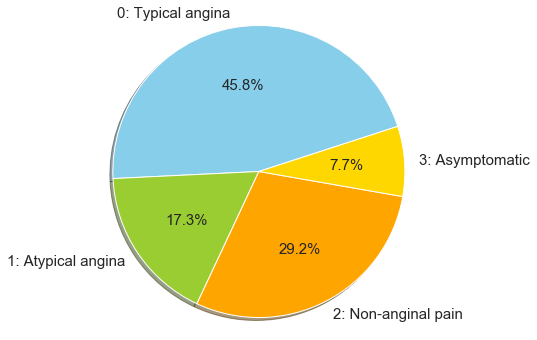

In [90]:
plt.figure(figsize=(8,6))

# Data to plot
labels = '0: Typical angina','1: Atypical angina','2: Non-anginal pain','3: Asymptomatic'
sizes = [len(df[df['cp'] == 0]),len(df[df['cp'] == 1]),
         len(df[df['cp'] == 2]),
         len(df[df['cp'] == 3])]
colors = ['skyblue', 'yellowgreen','orange','gold']
explode = (0,0,0,0)  # explode 1st slice
textprops = {"fontsize":15} # Font size of text in pie chart

# Plot
# plt.title("Chest Pain Type", fontdict = {'fontsize' : 20}, bbox={'facecolor':'0.8'})
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=18, textprops =textprops)
 
plt.axis('equal')
plt.show()

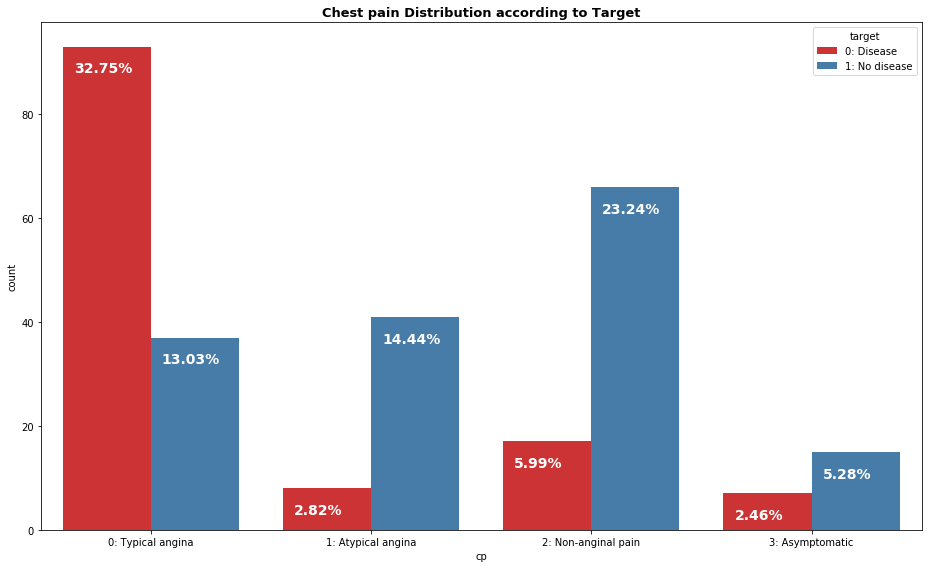

In [17]:
fig, ax = plt.subplots(figsize=(13,8))
ax = sns.countplot(x='cp', hue='target', data=df, palette='Set1')
ax.set_title("Chest pain Distribution according to Target", fontsize = 13, weight = 'bold')
ax.set_xticklabels (['0: Typical angina','1: Atypical angina','2: Non-anginal pain','3: Asymptomatic'])
leg = ax.get_legend()
new_labels = ['0: Disease', '1: No disease']
for t, l in zip(leg.texts, new_labels): t.set_text(l)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()-5,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

### According to our analysis on this dataset, someone suffering from typical angina type of chest pain is more likely to be a victim of heart diesease. This is illustrated by the bar chart above

### Feature 4: Resting blood pressure ('trestbps')

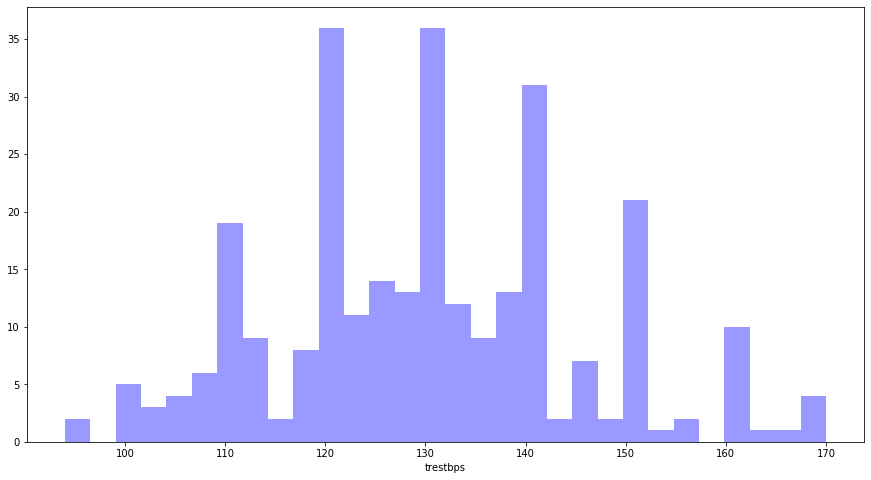

In [18]:
plt.figure(figsize=(15,8))
sns.distplot(df['trestbps'],kde=False,bins=30,color='blue')
plt.show()

### The above chart shows that the distribution of trestbps feature  is normally distributed

### Feature 5: Cholestrol level ('chol')

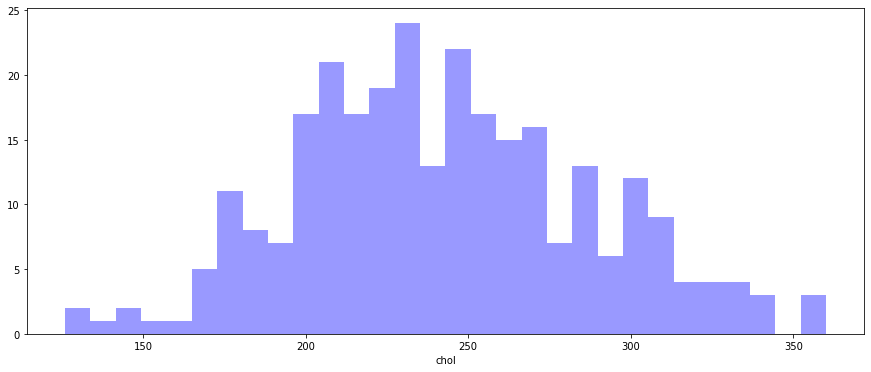

In [19]:
plt.figure(figsize=(15,6))
sns.distplot(df['chol'],kde=False,bins=30,color='blue')
plt.show()

### The above chart shows that the distribution of chol feature is normally distributed

### Feature 6: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

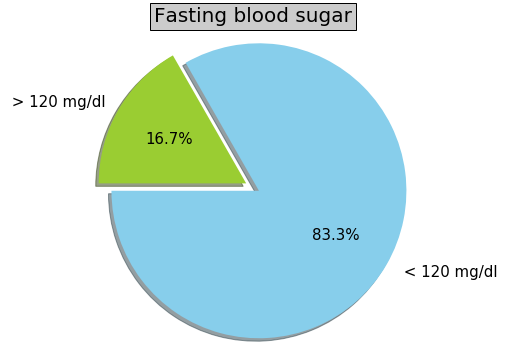

In [20]:
plt.figure(figsize=(8,6))
labels = ' < 120 mg/dl',' > 120 mg/dl'
sizes = [len(df[df['fbs'] == 0]),len(df[df['cp'] == 1])]
colors = ['skyblue', 'yellowgreen','orange','gold']
explode = (0.1, 0)  # explode 1st slice
textprops = {"fontsize":15} # Font size of text in pie chart

# Plot
plt.title("Fasting blood sugar", fontdict = {'fontsize' : 20}, bbox={'facecolor':'0.8'})
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180, textprops =textprops)
 
plt.axis('equal')
plt.show()

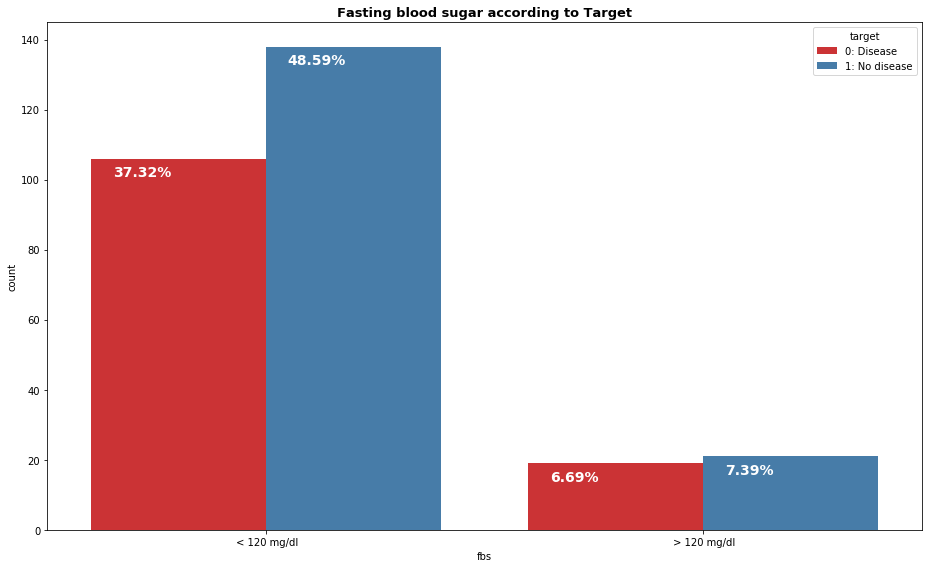

In [21]:
fig, ax = plt.subplots(figsize=(13,8))
ax = sns.countplot(x='fbs', hue='target', data=df, palette='Set1')
ax.set_title("Fasting blood sugar according to Target", fontsize = 13, weight = 'bold')
ax.set_xticklabels ([' < 120 mg/dl',' > 120 mg/dl'])
leg = ax.get_legend()
new_labels = ['0: Disease', '1: No disease']
for t, l in zip(leg.texts, new_labels): t.set_text(l)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()-5,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

### Fasting blood sugar or fbs is a diabetes indicator with fbs >120 mg/d is considered diabetic (True class). Here, we observe that the number for class true, is lower compared to class false. However, if we look closely, there are higher number of heart disease patient without diabetes. This indicates that fbs might not be a strong feature differentiating between heart disease an non-disease patient

### Feature 7: Resting ECG

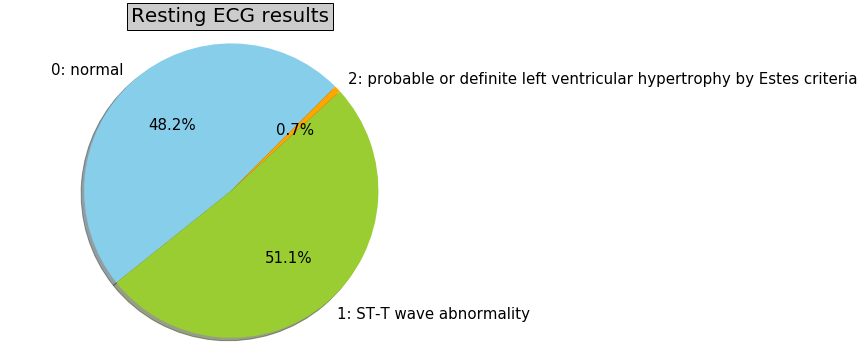

In [22]:
plt.figure(figsize=(8,6))
labels = '0: normal','1: ST-T wave abnormality' ,'2: probable or definite left ventricular hypertrophy by Estes criteria'
sizes = [len(df[df['restecg'] == 0]),len(df[df['restecg'] == 1]),
         len(df[df['restecg'] == 2])]
colors = ['skyblue', 'yellowgreen','orange']
explode = (0, 0,0)  # explode 1st slice
textprops = {"fontsize":15} # Font size of text in pie chart

# Plot
plt.title("Resting ECG results", fontdict = {'fontsize' : 20}, bbox={'facecolor':'0.8'})
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=45, textprops =textprops)
 
plt.axis('equal')
plt.show()

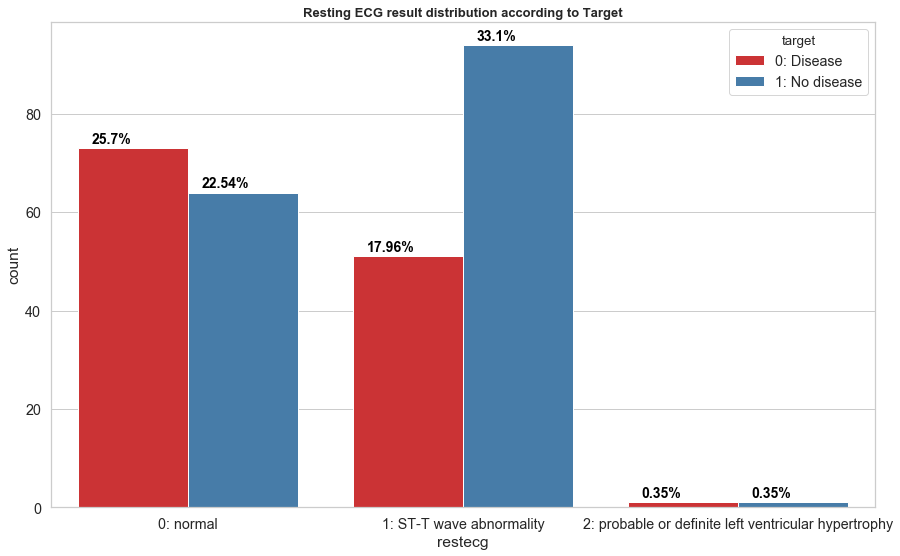

In [83]:
fig, ax = plt.subplots(figsize=(13,8))
ax = sns.countplot(x='restecg', hue='target', data=df, palette='Set1')
ax.set_title("Resting ECG result distribution according to Target", fontsize = 13, weight = 'bold')
ax.set_xticklabels (['0: normal','1: ST-T wave abnormality' ,'2: probable or definite left ventricular hypertrophy'])
leg = ax.get_legend()
new_labels = ['0: Disease', '1: No disease']
for t, l in zip(leg.texts, new_labels): t.set_text(l)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()+1,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='black', weight = 'bold')  
plt.tight_layout()

### It is surprising that normal ECG results from our dataset indicated more chances of having a heart disease

### Feature 8: Maximum heart rate achieved ('thalach')

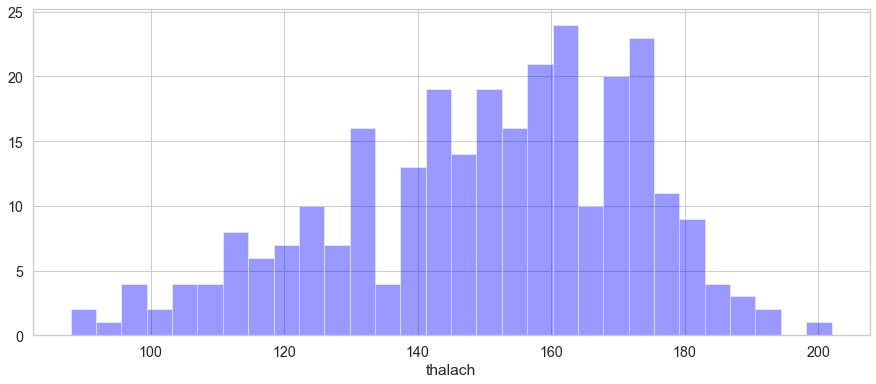

In [87]:
plt.figure(figsize=(15,6))
sns.distplot(df['thalach'],kde=False,bins=30,color='blue')

### The above chart shows that the distribution of thalach feature  is right skewed

### Feature 9: Exercise induced angina ('exang') (1 = yes; 0 = no)

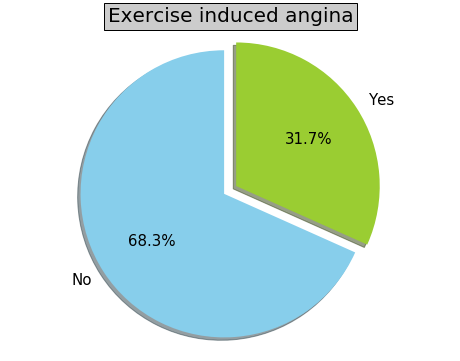

In [25]:
plt.figure(figsize=(8,6))
labels = 'No','Yes'
sizes = [len(df[df['exang'] == 0]),len(df[df['exang'] == 1])]
colors = ['skyblue', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice
textprops = {"fontsize":15} # Font size of text in pie chart

# Plot
plt.title("Exercise induced angina", fontdict = {'fontsize' : 20}, bbox={'facecolor':'0.8'})
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90, textprops =textprops)
 
plt.axis('equal')
plt.show()

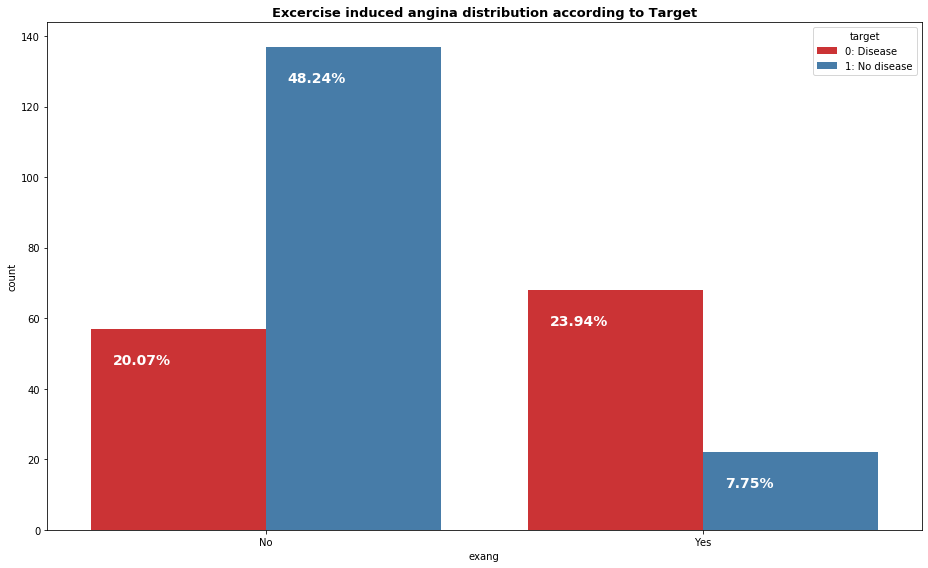

In [26]:
fig, ax = plt.subplots(figsize=(13,8))
ax = sns.countplot(x='exang', hue='target', data=df, palette='Set1')
ax.set_title("Excercise induced angina distribution according to Target", fontsize = 13, weight = 'bold')
ax.set_xticklabels (['No','Yes'])
leg = ax.get_legend()
new_labels = ['0: Disease', '1: No disease']
for t, l in zip(leg.texts, new_labels): t.set_text(l)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()-10,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

### We observe from the above chart that people with exercise induced angina have higher chances of suffering from heart dieseases

### Feature 10: ST depression induced by exercise relative to rest ('oldpeak')

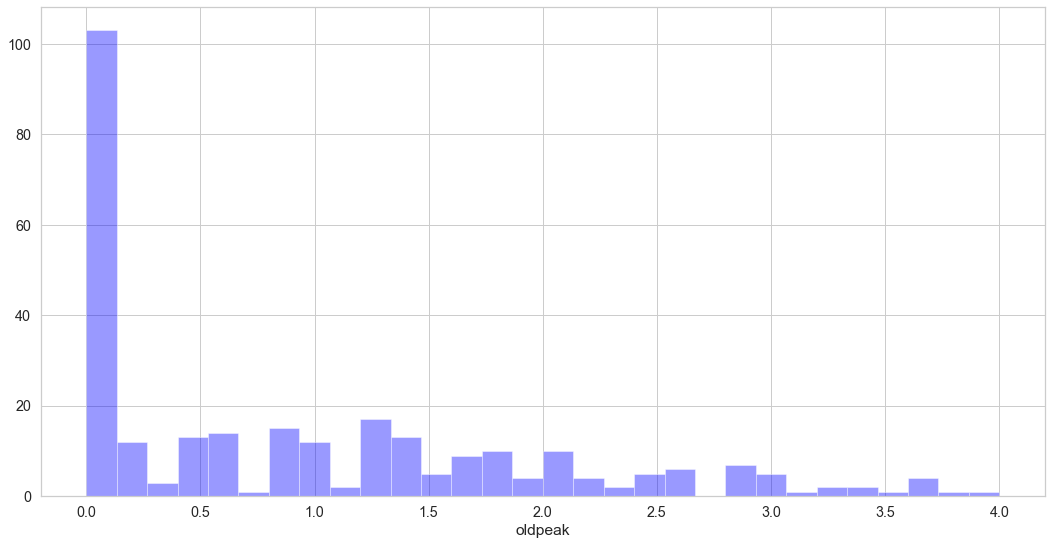

In [89]:
plt.figure(figsize=(18,9))
sns.distplot(df['oldpeak'],kde=False,bins=30,color='blue')

### The above chart shows that the distribution of oldpeak feature  is left skewed

### Feature 11: Slope of the peak exercise ST segment ('slope')

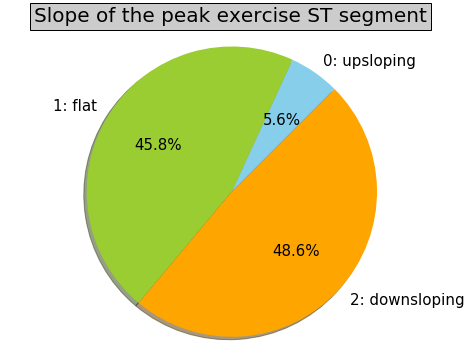

In [28]:
plt.figure(figsize=(8,6))
labels = '0: upsloping','1: flat' ,'2: downsloping'
sizes = [len(df[df['slope'] == 0]),len(df[df['slope'] == 1]),
         len(df[df['slope'] == 2])]
colors = ['skyblue', 'yellowgreen','orange']
explode = (0, 0,0)  # explode 1st slice
textprops = {"fontsize":15} # Font size of text in pie chart

# Plot
plt.title("Slope of the peak exercise ST segment", fontdict = {'fontsize' : 20}, bbox={'facecolor':'0.8'})
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=45, textprops =textprops)
 
plt.axis('equal')
plt.show()

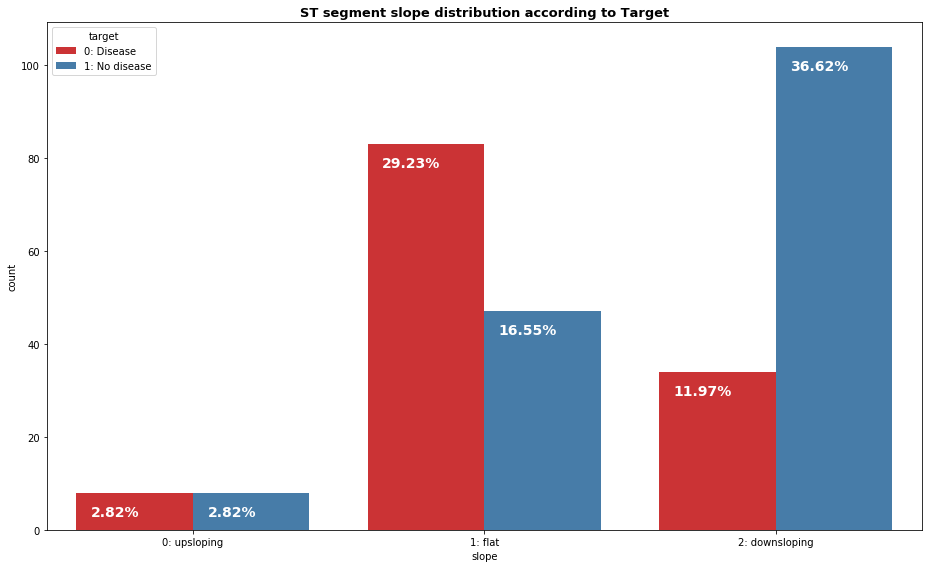

In [29]:
fig, ax = plt.subplots(figsize=(13,8))
ax = sns.countplot(x='slope', hue='target', data=df, palette='Set1')
ax.set_title("ST segment slope distribution according to Target", fontsize = 13, weight = 'bold')
ax.set_xticklabels (['0: upsloping','1: flat' ,'2: downsloping'])
leg = ax.get_legend()
new_labels = ['0: Disease', '1: No disease']
for t, l in zip(leg.texts, new_labels): t.set_text(l)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()-5,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

### From our analysis, people with a flat slope on the ST segment in their ECG are more likely to suffer from a heart disease

### Feature 12: Number of major vessels colored by flourosopy ('ca')

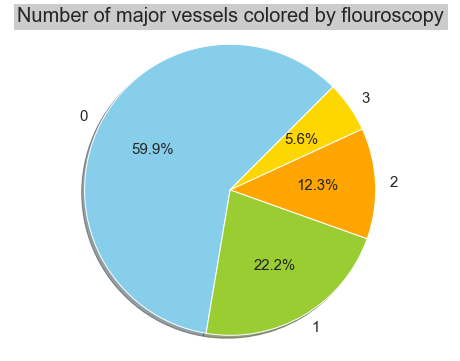

In [91]:
# Number of major vessels (0-3) colored by flourosopy

plt.figure(figsize=(8,6))

# Data to plot
labels = '0', '1', '2', '3'
sizes = [len(df[df['ca'] == 0]),len(df[df['ca'] == 1]),
         len(df[df['ca'] == 2]),
         len(df[df['ca'] == 3])]
colors = ['skyblue', 'yellowgreen','orange','gold']
explode = (0, 0,0,0)  # explode 1st slice
textprops = {"fontsize":15} # Font size of text in pie chart

# Plot
plt.title("Number of major vessels colored by flouroscopy", fontdict = {'fontsize' : 20}, bbox={'facecolor':'0.8'})
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=45, textprops =textprops)
 
plt.axis('equal')
plt.show()

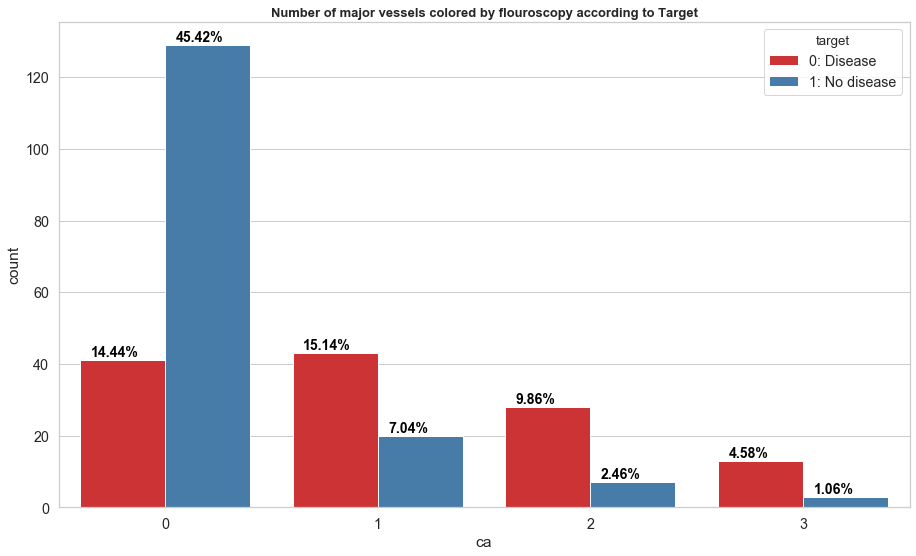

In [93]:
fig, ax = plt.subplots(figsize=(13,8))
ax = sns.countplot(x='ca', hue='target', data=df, palette='Set1')
ax.set_title("Number of major vessels colored by flouroscopy according to Target", fontsize = 13, weight = 'bold')
ax.set_xticklabels (['0', '1', '2', '3'])
leg = ax.get_legend()
new_labels = ['0: Disease', '1: No disease']
for t, l in zip(leg.texts, new_labels): t.set_text(l)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()+1,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='black', weight = 'bold')  
plt.tight_layout()

### It is evident from the above chart that the higher the number of major vessels colored by fluoroscopy, the higher are the chances of getting a heart disease

### Feature 13: thal : [1 = normal, 2 = fixed defect, 3 = reversible defect]

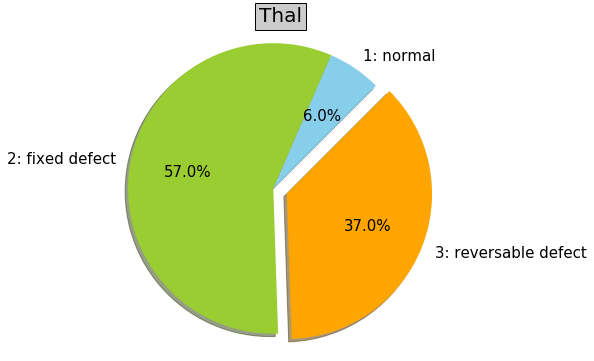

In [32]:
# thal: 1 = normal; 2 = fixed defect; 3 = : reversable defect

plt.figure(figsize=(8,6))

# Data to plot
labels = '1: normal', '2: fixed defect', '3: reversable defect'
sizes = [len(df[df['thal'] == 1]),
         len(df[df['thal'] == 2]),
         len(df[df['thal'] == 3])]
colors = ['skyblue', 'yellowgreen','orange','gold']
explode = (0, 0,0.1)  # explode 1st slice
textprops = {"fontsize":15} # Font size of text in pie chart

# Plot
plt.title("Thal", fontdict = {'fontsize' : 20}, bbox={'facecolor':'0.8'})
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=45, textprops =textprops)
 
plt.axis('equal')
plt.show()

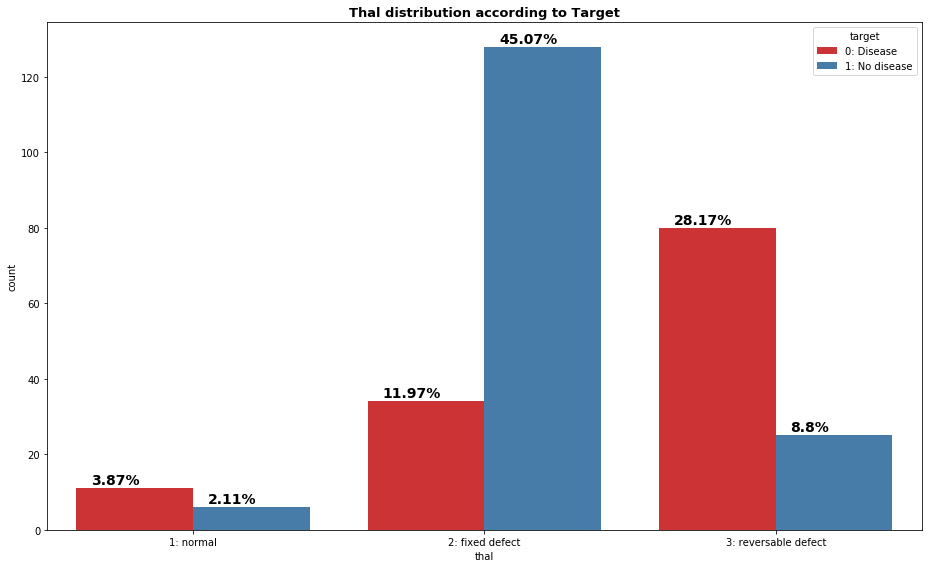

In [33]:
fig, ax = plt.subplots(figsize=(13,8))
ax = sns.countplot(x='thal', hue='target', data=df, palette='Set1')
ax.set_title("Thal distribution according to Target", fontsize = 13, weight = 'bold')
ax.set_xticklabels (['1: normal', '2: fixed defect', '3: reversable defect'])
leg = ax.get_legend()
new_labels = ['0: Disease', '1: No disease']
for t, l in zip(leg.texts, new_labels): t.set_text(l)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()+1,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='black', weight = 'bold')  
plt.tight_layout()

### Plotting a heatmap of correlation coefficients to obtain features that best predict the target value

In [34]:
sns.set_style('whitegrid')

In [35]:
def showHeatMap():   
    # fix for mpl bug that cuts off top/bottom of seaborn viz
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

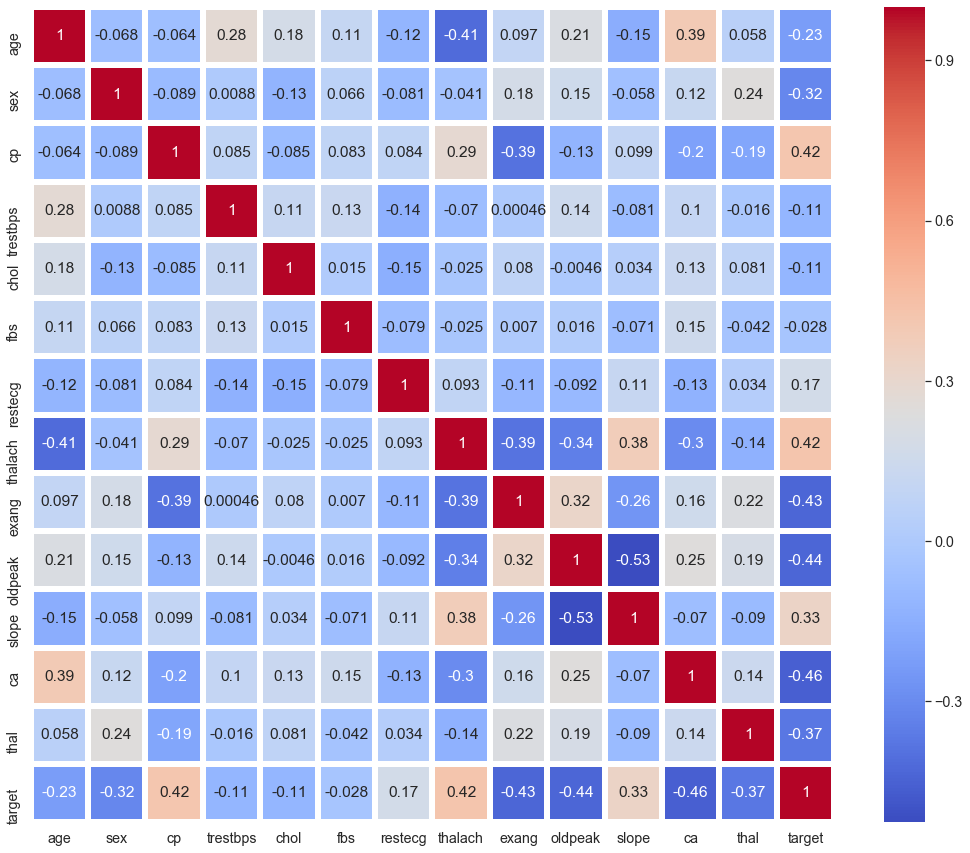

In [36]:
# Correlation heatmap

plt.figure(figsize=(18,15))
sns.set(font_scale=1.3)
sns.heatmap(df.corr(), annot = True, cmap='coolwarm',linewidths=5)
showHeatMap()

### Checking for imbalance in the data

In [37]:
X= df.drop('target',axis=1)
Y=df['target']
featureNames = X.columns
X = X.values
print('\nBalance of positive and negative classes (%):\n', Y.value_counts(normalize=True) * 100)


Balance of positive and negative classes (%):
 1    55.985915
0    44.014085
Name: target, dtype: float64


### Since there is an imbalance in the target values of our data, we apply SMOTE technique and balance it

In [38]:
sm = SMOTE(random_state=42)
X, Y = sm.fit_resample(X, Y)
print('\nBalance of positive and negative classes (%):\n', Y.value_counts(normalize=True) * 100)


Balance of positive and negative classes (%):
 1    50.0
0    50.0
Name: target, dtype: float64


#### Data has been undersampled to delete random values from the majority dataset so that both the classes are now balanced.

### Splitting the data into tranining (70%), test (30%) datasets to fit a linear model and calculate the mean square error, variance of each feature. This along with the heatmap above will help us is ideantifying the features that best predict the target value.

In [39]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.3,random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)
X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

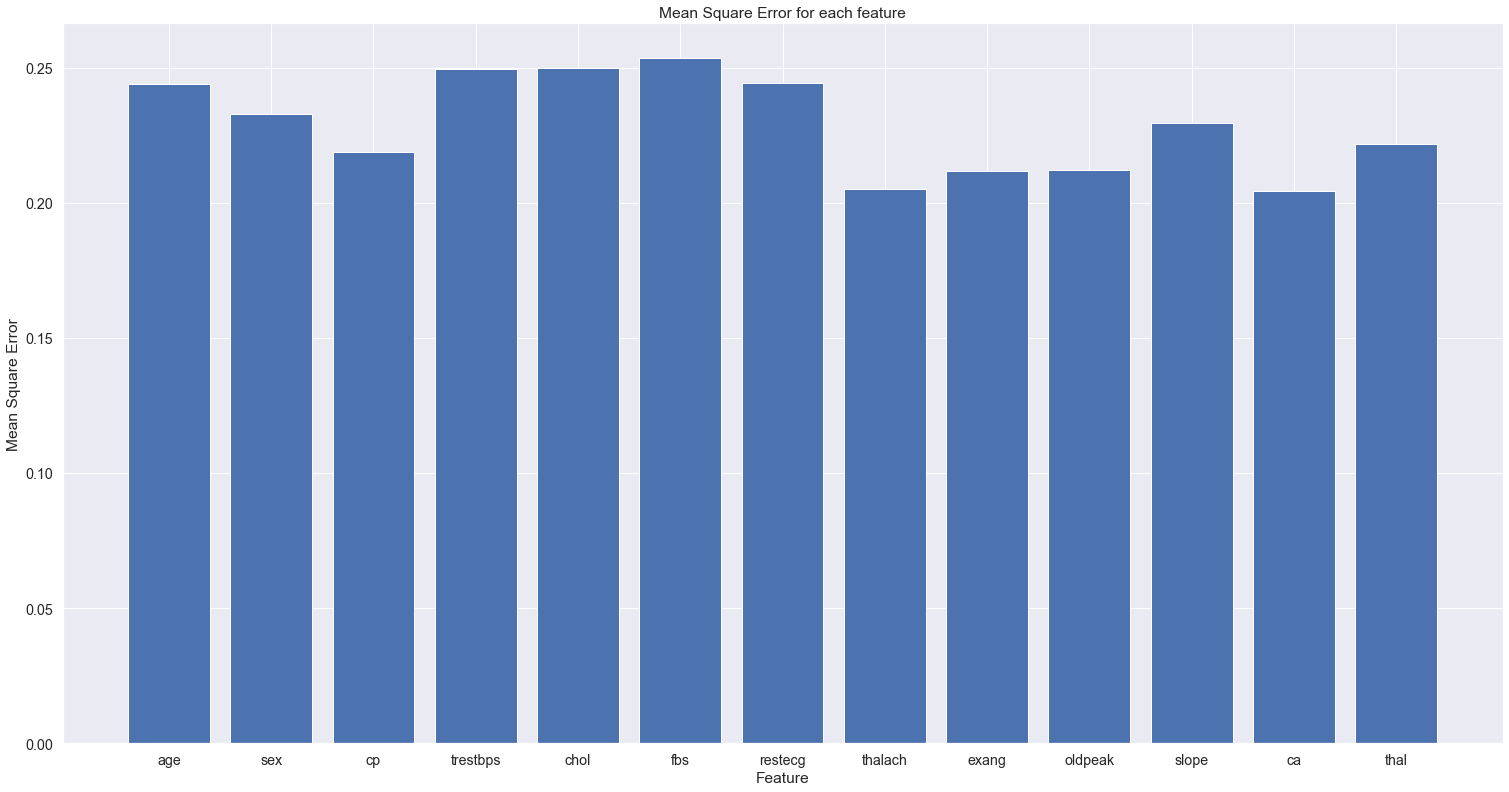

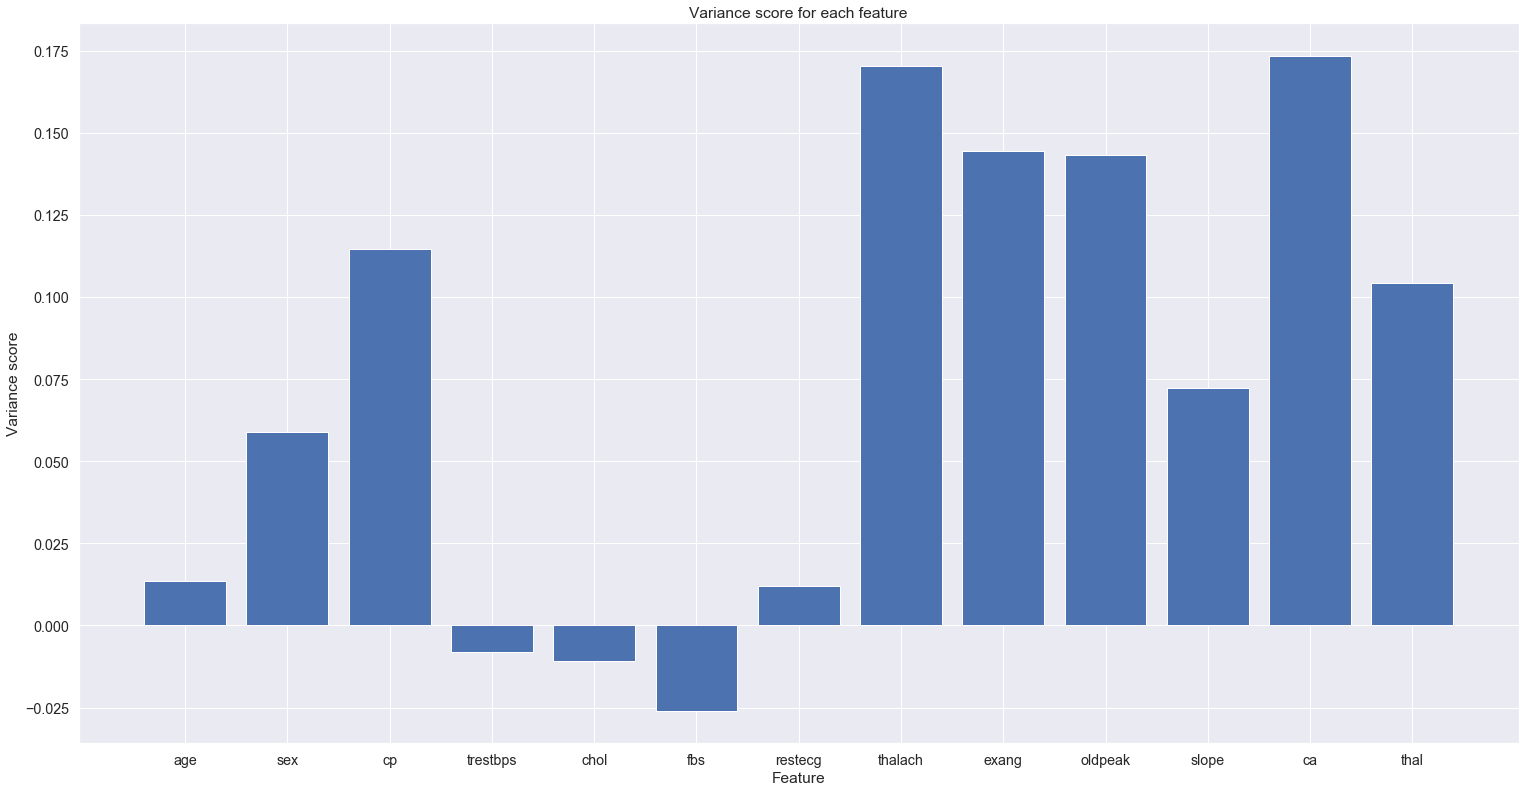

In [41]:
def fitModel(feature, X, Y):
    linearFeatureModel = LinearRegression()
    return linearFeatureModel.fit(X[:,feature].reshape(-1,1), Y)

def calculateStats(feature, X, Y, model):
    coefficient = model.coef_
    meanSqErr = np.mean(((model.predict(X[:,feature].reshape(-1,1)) - Y) ** 2))
    variance = model.score(X[:,feature].reshape(-1,1) , Y)
    return [coefficient, meanSqErr, variance]
    
def plotModel(feature, X_train, Y_train, X_test, Y_test, model):
    plt.figure(figsize=(20,10))
    predictions = linearFeatureModel.predict(X_test[:, featureNumber].reshape(-1,1))
    plt.plot(X_test[:, featureNumber], predictions)
    trainingPoints = plt.scatter(X_train[:,featureNumber], Y_train, color = 'red')
    testingPoints = plt.scatter(X_test[:,featureNumber], Y_test, color = 'green')
    plt.xlabel(featureNames[featureNumber], fontsize=18)
    plt.ylabel('Median Value', fontsize=18)
    plt.legend((trainingPoints, testingPoints), ('Training point', 'Testing point'), scatterpoints=1,\
               loc='upper right', ncol=3, fontsize=18)
    plt.show()

avgMeanSqFeature = [0] * len(featureNames)
avgVarianceFeature = [0] * len(featureNames)
for i in range(10):
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split (X,Y, test_size=0.2)
    for featureNumber in range(len(featureNames)): 
        # Fit a linear regression model on the training set for each feature
        linearFeatureModel = fitModel(featureNumber, X_train, Y_train)    
        # Calculate the mean squared error and variance score
        [temp, meanSqErr, variance] = calculateStats(featureNumber, X_test, Y_test, linearFeatureModel)
        avgMeanSqFeature[featureNumber] += meanSqErr
        avgVarianceFeature[featureNumber] += variance
    
# Result for fitting model using one feature at a time
for featureNumber in range(len(featureNames)):
    avgMeanSqFeature[featureNumber] = avgMeanSqFeature[featureNumber]/10
    avgVarianceFeature[featureNumber] = avgVarianceFeature[featureNumber]/10

# Plot showing mean square error vs. features
fig = plt.figure(figsize=(20,10))
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('Feature')
ax.set_ylabel('Mean Square Error')
ax.set_title('Mean Square Error for each feature')
ax.bar(featureNames, avgMeanSqFeature)
plt.rcParams.update({'font.size': 2})
plt.show()

# Plot showing variance score vs. features
fig = plt.figure(figsize=(20,10))
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('Feature')
ax.set_ylabel('Variance score')
ax.set_title('Variance score for each feature')
ax.bar(featureNames, avgVarianceFeature)
plt.show()

In [42]:
# for featureNumber in range(len(featureNames)):
#     # Fit a linear regression model on the training set for each feature
#     linearFeatureModel = fitModel(featureNumber, X_train, Y_train)
    
#     # Calculate and print the coefficient, mean squared error and variance score
#     [coefficient, meanSqErr, variance] = calculateStats(featureNumber, X_test, Y_test, linearFeatureModel)
#     #The feature being fitted
#     print("Feature used:", featureNames[featureNumber])
#     # The coefficient
#     print("Coefficient:", coefficient)
#     # The mean squared error
#     print("Mean squared error: %.2f" % meanSqErr)
#     # Explained variance score : 1 is perfect prediction
#     print("Variance score: %.2f\n" % variance)
    
#     # Plot the training points, test points and the linear regression line
#     plotModel(featureNumber, X_train, Y_train, X_test, Y_test, linearFeatureModel)

### Making scatterplots of the most correlated numerical features, categorical features are ignored

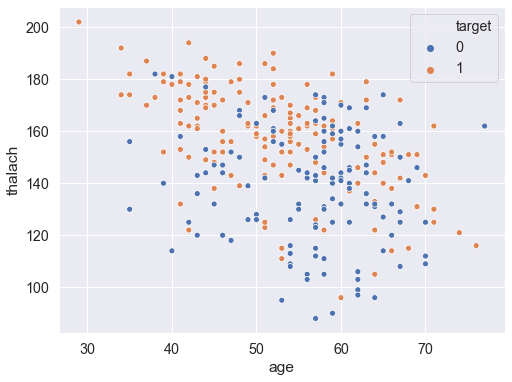

In [43]:
# Scatterplot for age vs. chol (cholestrol level)

plt.figure(figsize=(8,6))
sns.scatterplot(x='age',y='thalach',data=df,hue='target')
plt.show()

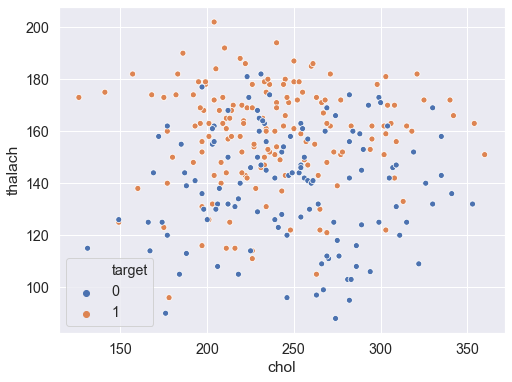

In [44]:
# Scatterplot for thalach (Max heart rate) vs. chol (cholestrol level)

plt.figure(figsize=(8,6))
sns.scatterplot(x='chol',y='thalach',data=df,hue='target')
plt.show()

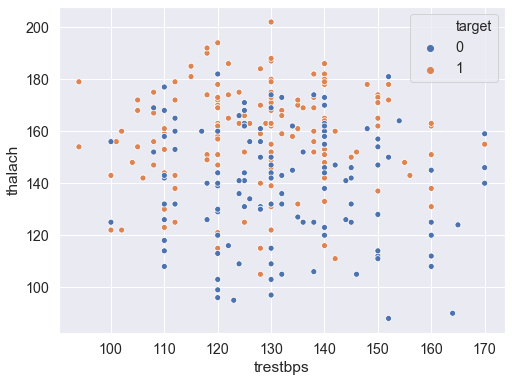

In [45]:
# Scatterplot for thalach (Max heart rate) vs. trestbps (resting blood pressure)

plt.figure(figsize=(8,6))
sns.scatterplot(x='trestbps',y='thalach',data=df,hue='target')
plt.show()

### Applying k-Nearest Neighors algorithm

In [46]:
# 1. k-Nearest Neighor Algorithm

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
knn =KNeighborsClassifier()
params = {'n_neighbors':list(range(1,20)),
    'p':[1, 2, 3, 4,5,6,7,8,9,10],
    'leaf_size':list(range(1,20)),
    'weights':['uniform', 'distance']
         }

In [47]:
model = GridSearchCV(knn,params,cv=3, n_jobs=-1)
model.fit(X_train,Y_train)
model.best_params_     

{'leaf_size': 1, 'n_neighbors': 19, 'p': 6, 'weights': 'distance'}

In [48]:
predict = model.predict(X_train)
print('Using k-NN on the training set we get an accuracy score of: ',
      round(accuracy_score(Y_train,predict),2)*100,'%')

Using k-NN on the training set we get an accuracy score of:  100.0 %


In [49]:
predict = model.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy Score: ',accuracy_score(Y_test,predict))
print('Using k-NN we get an accuracy score of: ',
      round(accuracy_score(Y_test,predict),2)*100,'%')

Accuracy Score:  0.59375
Using k-NN we get an accuracy score of:  59.0 %


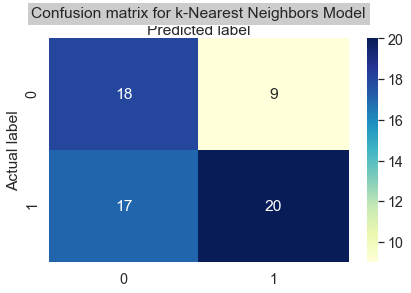

In [51]:
# Confusion matrix

cnf_matrix = confusion_matrix(Y_test,predict)
cnf_matrix

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.set(font_scale=1.3)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for k-Nearest Neighbors Model', y = 1.1, bbox={'facecolor':'0.8'})
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
showHeatMap()

In [52]:
# Classification report

from sklearn.metrics import classification_report
print(classification_report(Y_test,predict))

              precision    recall  f1-score   support

           0       0.51      0.67      0.58        27
           1       0.69      0.54      0.61        37

    accuracy                           0.59        64
   macro avg       0.60      0.60      0.59        64
weighted avg       0.62      0.59      0.60        64



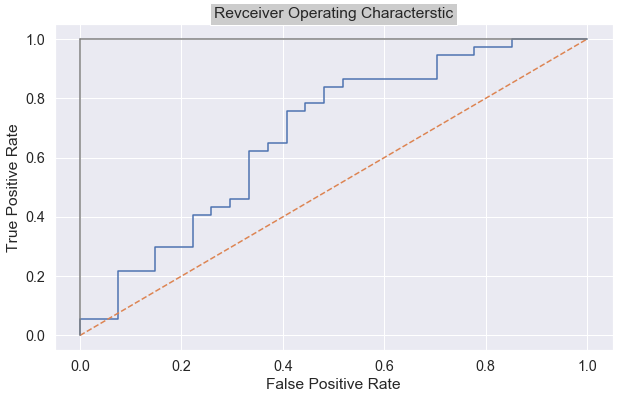

In [53]:
# Receiver Operating Characterstic(ROC) Curve

from sklearn.metrics import roc_auc_score,roc_curve

#Get predicted probabilites from the model
y_probabilities = model.predict_proba(X_test)[:,1]

#Create true and false positive rates
false_positive_rate_knn,true_positive_rate_knn,threshold_knn = roc_curve(Y_test,y_probabilities)

#Plot ROC Curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic', bbox={'facecolor':'0.8'})
plt.plot(false_positive_rate_knn,true_positive_rate_knn)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [54]:
#Calculate area under the curve
roc_auc_score(Y_test,y_probabilities)

0.6756756756756758

### Applying Logistic Regression

In [55]:
# 2. Logistic Regression

from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

# Setting parameters for GridSearchCV
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
log_model = GridSearchCV(log,param_grid=params,cv=10)

log_model.fit(X_train,Y_train)

# Printing best parameters choosen through GridSearchCV
log_model.best_params_

{'C': 100, 'class_weight': None, 'penalty': 'l2'}

In [56]:
predict = log_model.predict(X_train)
print('Using Logistic Regression on the training set we get an accuracy score of: ',
      round(accuracy_score(Y_train,predict),2)*100,'%')

Using Logistic Regression on the training set we get an accuracy score of:  89.0 %


In [57]:
predict = log_model.predict(X_test)

In [58]:
print('Accuracy Score: ',accuracy_score(Y_test,predict))
print('Using Logistic Regression we get an accuracy score of: ',
      round(accuracy_score(Y_test,predict),5)*100,'%')

Accuracy Score:  0.859375
Using Logistic Regression we get an accuracy score of:  85.938 %


In [59]:
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve
print(classification_report(Y_test,predict))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82        27
           1       0.83      0.95      0.89        37

    accuracy                           0.86        64
   macro avg       0.87      0.84      0.85        64
weighted avg       0.87      0.86      0.86        64



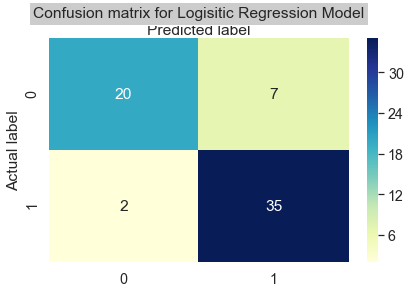

In [60]:
# Confusion Matrix

cnf_matrix = confusion_matrix(Y_test,predict)
cnf_matrix

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for Logisitic Regression Model', y = 1.1, bbox={'facecolor':'0.8'})
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
showHeatMap()

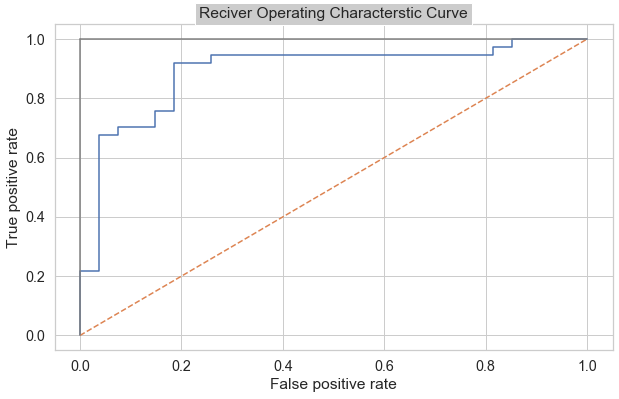

In [61]:
# Receiver Operating Characterstic(ROC) Curve

#Get predicted probabilites
target_probailities_log = log_model.predict_proba(X_test)[:,1]

#Create true and false positive rates
log_false_positive_rate,log_true_positive_rate,log_threshold = roc_curve(Y_test,
                                                             target_probailities_log)

#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve', bbox={'facecolor':'0.8'})
plt.plot(log_false_positive_rate,log_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [62]:
#Calculate area under the curve
roc_auc_score(Y_test,target_probailities_log)

0.8908908908908909

### Applying Decision Tree algorithm

In [63]:
# 3. Decision Tree

from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(random_state=7)

#Setting parameters for GridSearchCV
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}
tree_model = GridSearchCV(dtree, param_grid=params, n_jobs=-1)

tree_model.fit(X_train,Y_train)
#Printing best parameters selected through GridSearchCV
tree_model.best_params_

{'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5}

In [64]:
predict = tree_model.predict(X_train)
print('Using Decision Tree algorithm on the training set we get an accuracy score of: ',
      round(accuracy_score(Y_train,predict),2)*100,'%')

Using Decision Tree algorithm on the training set we get an accuracy score of:  95.0 %


In [65]:
predict = tree_model.predict(X_test)

In [66]:
from sklearn.metrics import accuracy_score
print('Accuracy Score: ',accuracy_score(Y_test,predict))
print('Using Decision Tree we get an accuracy score of: ',
      round(accuracy_score(Y_test,predict),5)*100,'%')

Accuracy Score:  0.640625
Using Decision Tree we get an accuracy score of:  64.062 %


In [67]:
from sklearn.metrics import classification_report,roc_auc_score,roc_curve

print(classification_report(Y_test,predict))

              precision    recall  f1-score   support

           0       0.55      0.81      0.66        27
           1       0.79      0.51      0.62        37

    accuracy                           0.64        64
   macro avg       0.67      0.66      0.64        64
weighted avg       0.69      0.64      0.64        64



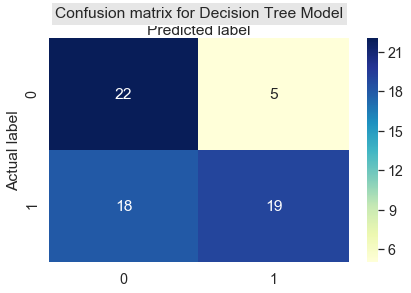

In [68]:
# Confusion Matrix

cnf_matrix = confusion_matrix(Y_test,predict)
cnf_matrix

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for Decision Tree Model', y = 1.1, bbox={'facecolor':'0.9'})
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
showHeatMap()

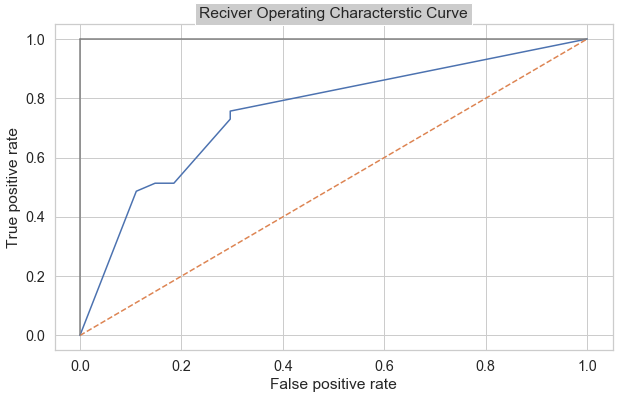

In [69]:
# Receiver Operating Characterstic(ROC) Curve

#Get predicted probabilites
target_probailities_tree = tree_model.predict_proba(X_test)[:,1]

#Create true and false positive rates
tree_false_positive_rate,tree_true_positive_rate,tree_threshold = roc_curve(Y_test,
                                                             target_probailities_tree)

#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve', bbox={'facecolor':'0.8'})
plt.plot(tree_false_positive_rate,tree_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

## Applying RandomForest Classifier

In [70]:
from sklearn.ensemble import RandomForestClassifier

rfclassifier = RandomForestClassifier(n_estimators=200)
rfclassifier.fit(X_train,Y_train)


RandomForestClassifier(n_estimators=200)

In [71]:
predict = rfclassifier.predict(X_train)
print('Using RandomForest Classifier we get an accuracy score of: ',
      round(accuracy_score(Y_train,predict),2)*100,'%')

Using RandomForest Classifier we get an accuracy score of:  100.0 %


In [72]:
predict= rfclassifier.predict(X_test)

In [73]:
from sklearn.metrics import accuracy_score
print('Accuracy Score: ',accuracy_score(Y_test,predict))
print('Using RandomForest we get an accuracy score of: ',
      round(accuracy_score(Y_test,predict),5)*100,'%')

Accuracy Score:  0.859375
Using RandomForest we get an accuracy score of:  85.938 %


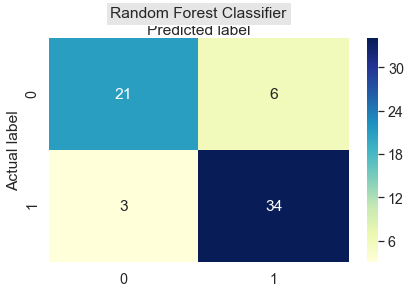

In [74]:
# Confusion Matrix

cnf_matrix = confusion_matrix(Y_test,predict)
cnf_matrix

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Random Forest Classifier', y = 1.1, bbox={'facecolor':'0.9'})
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
showHeatMap()

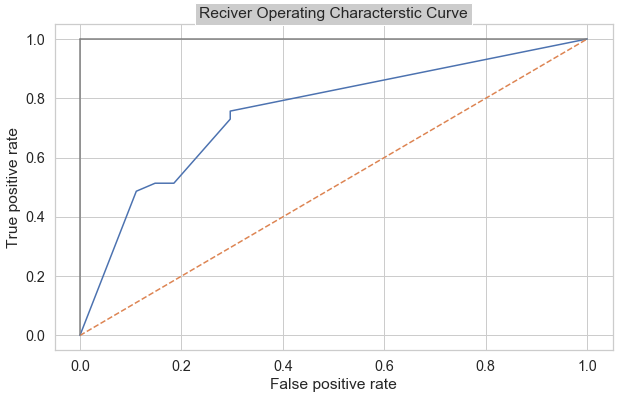

In [75]:
# Receiver Operating Characterstic(ROC) Curve

#Get predicted probabilites
target_probailities_tree = rfclassifier.predict_proba(X_test)[:,1]

#Create true and false positive rates
rf_false_positive_rate,rf_true_positive_rate,tree_threshold = roc_curve(Y_test,
                                                             target_probailities_tree)

#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve', bbox={'facecolor':'0.8'})
plt.plot(tree_false_positive_rate,tree_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

## Applying AdaBoost Classifier

In [76]:
from sklearn.ensemble import AdaBoostClassifier
adaclf= AdaBoostClassifier(n_estimators = 20)
#weirdly n_estimators increase causes the score to decrease after ~20. Meaning that the distribution is simple. 
#Possibly linear as confirmed by previous classifiers
adaclf.fit(X_train, Y_train)

AdaBoostClassifier(n_estimators=20)

In [77]:
predict = adaclf.predict(X_train)
print('Using AdaBoost we get an accuracy score of: ',
      round(accuracy_score(Y_train,predict),2)*100,'%')

Using AdaBoost we get an accuracy score of:  92.0 %


In [78]:
predict = adaclf.predict(X_test)

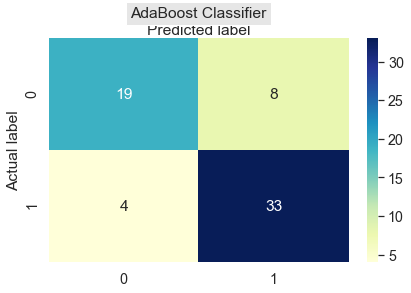

In [79]:
# Confusion Matrix

cnf_matrix = confusion_matrix(Y_test,predict)
cnf_matrix

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('AdaBoost Classifier', y = 1.1, bbox={'facecolor':'0.9'})
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
showHeatMap()

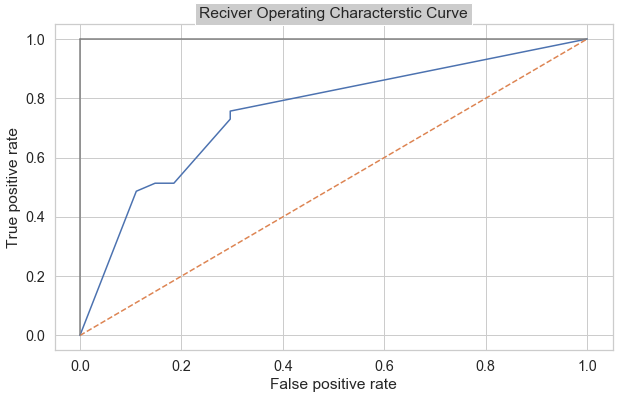

In [80]:
# Receiver Operating Characterstic(ROC) Curve

#Get predicted probabilites
target_probailities_tree = adaclf.predict_proba(X_test)[:,1]

#Create true and false positive rates
ada_false_positive_rate,ada_true_positive_rate,tree_threshold = roc_curve(Y_test,
                                                             target_probailities_tree)

#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve', bbox={'facecolor':'0.8'})
plt.plot(tree_false_positive_rate,tree_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

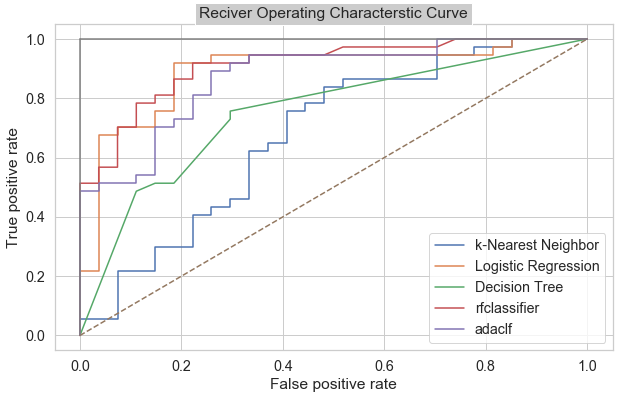

In [81]:
# Comparing ROC Curve of k-Nearest Neighbors, Logistic Regression and Decision Tree

#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve', bbox={'facecolor':'0.8'})
plt.plot(false_positive_rate_knn,true_positive_rate_knn,label='k-Nearest Neighbor')
plt.plot(log_false_positive_rate,log_true_positive_rate,label='Logistic Regression')
plt.plot(tree_false_positive_rate,tree_true_positive_rate,label='Decision Tree')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='rfclassifier')
plt.plot(ada_false_positive_rate,ada_true_positive_rate,label='adaclf')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()